# **Intro**

## An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products. (https://www.kaggle.com/datasets/nayanack/shipping/data)

## Features:

ID: ID Number of Customers.

Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.

Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.

Customer care calls: The number of calls made from enquiry for enquiry of the shipment.

Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).

Cost of the product: Cost of the Product in US Dollars.

Prior purchases: The Number of Prior Purchase.

Product importance: The company has categorized the product in the various parameter such as low, medium, high.

Gender: Male and Female.

Discount offered: Discount offered on that specific product.

Weight in gms: It is the weight in grams.

Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.exceptions import FitFailedWarning
from sklearn.exceptions import ConvergenceWarning

# Loading the csv as a DataFrame
df = pd.read_csv('shipping.csv', encoding='iso-8859-1')

# Checking the dataframe
# df.info()
# print(df.isna().sum())

# Analytics

Distribution of mode of shipmment by reached on time

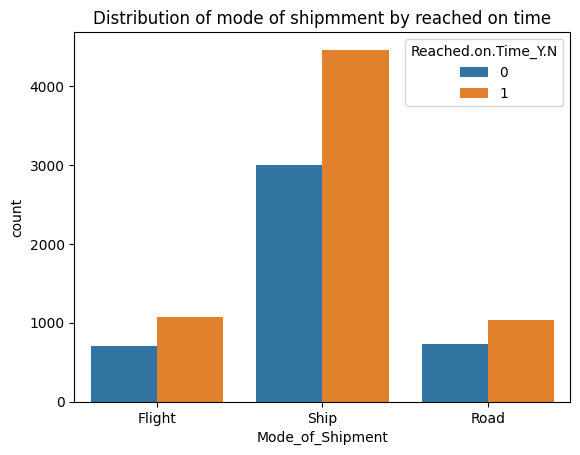

In [2]:
plt.title('Distribution of mode of shipmment by reached on time')
sns.countplot(data = df, x = 'Mode_of_Shipment', hue = 'Reached.on.Time_Y.N')
plt.show()

Distribution of warehouse block by reached on time

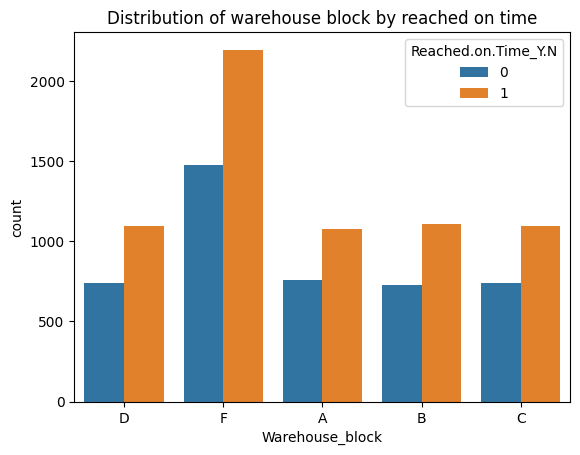

In [3]:
plt.title('Distribution of warehouse block by reached on time')
sns.countplot(data = df, x = 'Warehouse_block', hue = 'Reached.on.Time_Y.N')
plt.show()

Distribution of products by cost

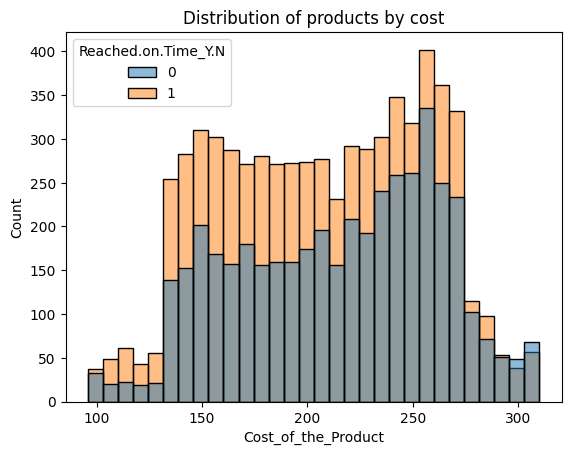

In [4]:
plt.title('Distribution of products by cost')
sns.histplot(data=df,x='Cost_of_the_Product', hue = 'Reached.on.Time_Y.N')
plt.show()

Distribution of products by weight

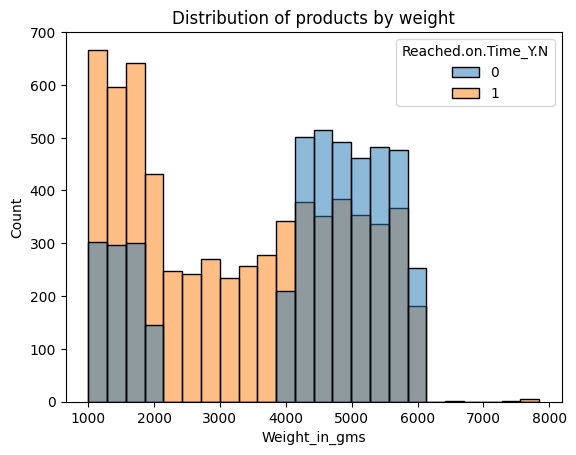

In [5]:
plt.title('Distribution of products by weight')
sns.histplot(data=df,x='Weight_in_gms', hue = 'Reached.on.Time_Y.N')
plt.show()

Distribution of deliveries by number of prior purchases and reached on time

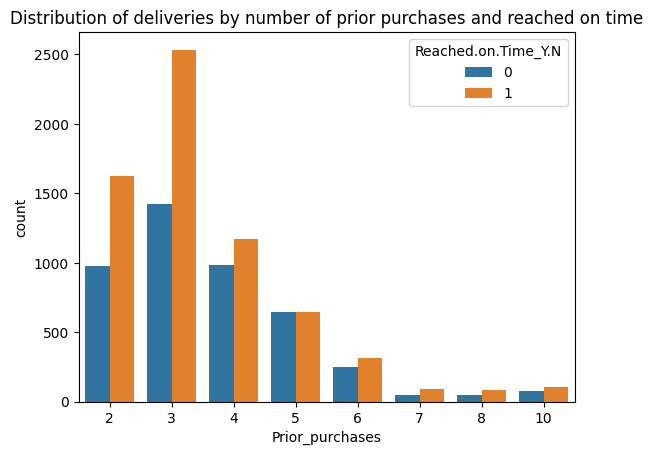

In [6]:
plt.title('Distribution of deliveries by number of prior purchases and reached on time')
sns.countplot(data=df, x='Prior_purchases', hue = 'Reached.on.Time_Y.N')
plt.show()

Distribution of customer calls by reached on time

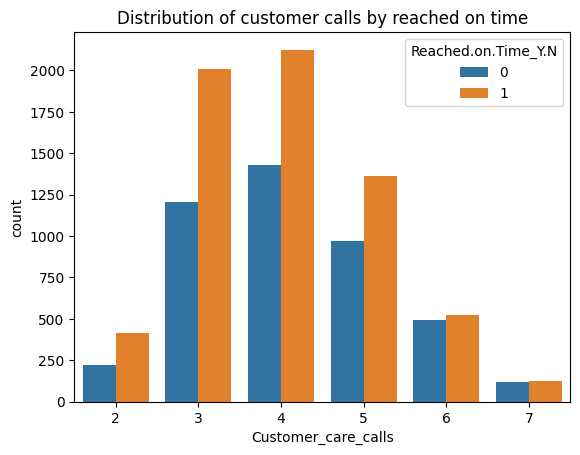

In [7]:
plt.title('Distribution of customer calls by reached on time')
sns.countplot(data = df, x = 'Customer_care_calls', hue = 'Reached.on.Time_Y.N')
plt.show()

### The data analysis gives us an idea about the distribution of late arrivals and their relation to business characteristics, such as the mode of shipment, warehouse block, cost of the product, weight of the product, prior purchases by respective customers and customer care calls related to the shipment.

# Feature engineering

In [8]:
# Removing ID from df
df = df.drop(columns=['ï»¿ID'])

# Encoding 'Warehouse_block', 'Mode_of_Shipment', 'Product_importance' and 'Gender'
df = pd.get_dummies(data = df, columns = ['Warehouse_block'], prefix='Warehouse_block_', drop_first = True, dtype = int)
df = pd.get_dummies(data = df, columns = ['Mode_of_Shipment'], prefix='Mode_of_Shipment_', drop_first = True, dtype = int)
df = pd.get_dummies(data = df, columns = ['Product_importance'], prefix='Product_importance_', drop_first = True, dtype = int)
df = pd.get_dummies(data = df, columns = ['Gender'], prefix='Gender_', drop_first = True, dtype = int)

# Adding two new features : 'cost_of_the_product_per_gram' and 'cost_minus_discount'
df['cost_of_the_product_per_gram'] = df['Cost_of_the_Product']/df['Weight_in_gms']
df['cost_minus_discount'] = df['Cost_of_the_Product']-df['Discount_offered']

# df.info()
# df

# Correlations

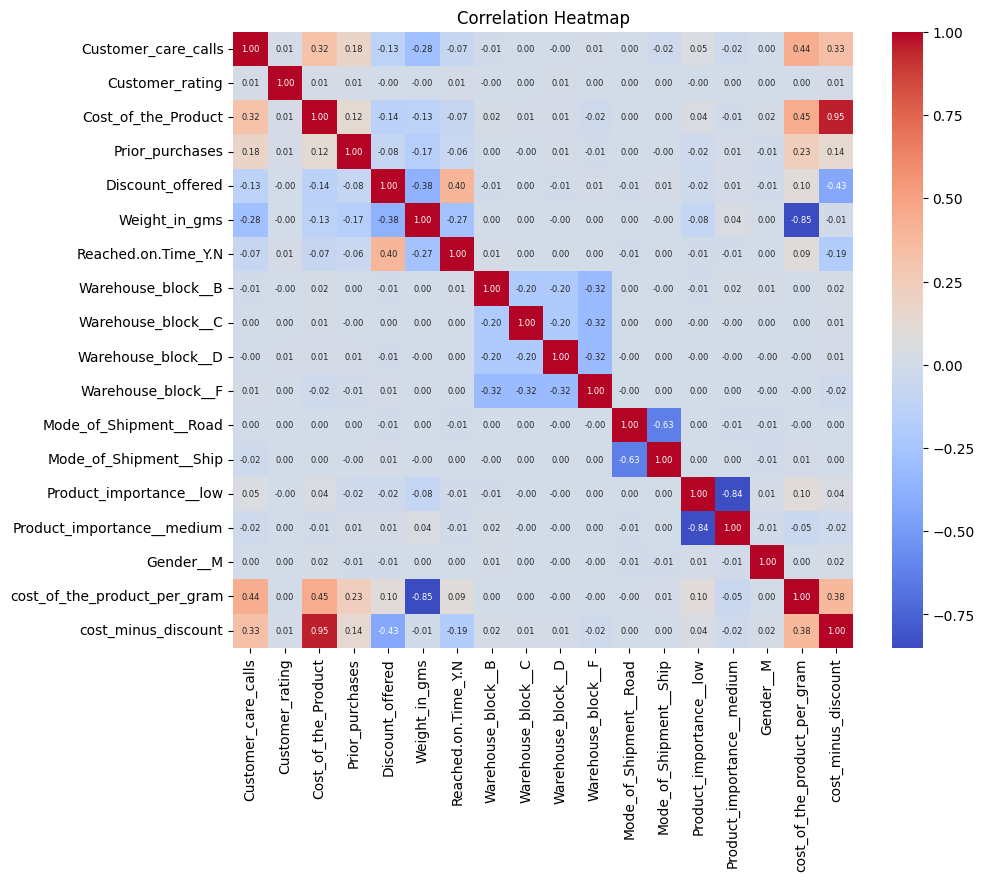

In [9]:
# Building the correlation matrix
correlation_matrix = df.corr()
correlation_matrix = correlation_matrix.round(2)

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", annot=True, annot_kws={"fontsize": 6})
plt.title('Correlation Heatmap')
plt.show()

### Via the correlation matrix we can tell that more often than not the products that arrived late were also discounted. Additionally, to a lesser extent products that arrived late were on the lighter side in terms of weight.

# Classification algorithms

In [10]:
# Splitting the dataset into a train set and a test set
y = df['Reached.on.Time_Y.N']
X = df.drop(columns = 'Reached.on.Time_Y.N')
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, stratify=y)

Scaling

In [11]:
# Scaling the features
sc = StandardScaler()
columns_to_scale = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'cost_of_the_product_per_gram', 'cost_minus_discount']
X_train[columns_to_scale] = sc.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = sc.transform(X_test[columns_to_scale])

In [12]:
# Receiver Operating Characteristic (ROC) curve
def plot_roc(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1, drop_intermediate = False)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.001, 1.001])
    plt.ylim([-0.001, 1.001])
    plt.xlabel('1-Specificity (False Negative Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

# Sensitivity
def custom_sensitivity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fn))

# FPR
def custom_FPR_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (fp/(fp+tn))

# Specificity
def custom_specificity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fp))

# Positive Predictive Value
def custom_ppv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fp))

# Negative Predictive Value
def custom_npv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fn))

# Accuracy
def custom_accuracy_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return ((tn+tp)/(tn+tp+fn+fp))

# Best model search via GridSearch

In [13]:
# Creating parameters for GridSearch
LR_params_liblinear = {
             'penalty' : ['l1', 'l2'],
             'C' : [0.01, 0.1, 0.2],
             'fit_intercept' : [True, False],
             'intercept_scaling' : [0.01, 0.1, 0.2],
             'max_iter': [20, 25, 30],
             'solver' : ['liblinear']
             }

LR_params_saga = {
             'penalty' : ['elasticnet'],
             'C' : [0.01, 0.1, 0.2],
             'fit_intercept' : [True, False],
             'intercept_scaling' : [0.01, 0.1, 0.2],
             'max_iter': [20, 25, 30],
             'l1_ratio' : [0.2, 0.5, 0.8, 0.95],
             'solver' : ['saga']
             }

LR_params_others = {
             'penalty' : ['l2'],
             'C' : [0.1, 0.2, 0.3],
             'fit_intercept' : [True, False],
             'intercept_scaling' : [0.01, 0.1, 0.2],
             'max_iter': [20, 25, 30],
             'solver' : ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag']
             }

DT_params = {
             'max_leaf_nodes': [21, 22, 23],
             'criterion' : ['gini', 'entropy', 'log_loss'],
             'splitter' : ['best', 'random']
             }

RF_params = {
             'n_estimators': [198, 200, 202],
             'criterion' : ['gini', 'entropy', 'log_loss'],
             'max_features' : ['sqrt', None],
             'bootstrap' : [True, False]
             }

GBC_params = {
              'n_estimators': [222, 223, 224],
              'learning_rate': [0.01, 0.1, 0.2],
              'loss' : ['log_loss'],
              'criterion' : ['friedman_mse'],
              'max_depth' : [ 3, 4, 5]
              }

SVC_params = {
              'C': [0.18, 0.185, 0.193,],
              'kernel': ['linear', 'poly', 'rbf'],
              'gamma': ['scale', 'auto'],
              'decision_function_shape' : ['ovo', 'ovr']
              }

KNN_params = {
              'n_neighbors' : [21, 22, 23],
              'weights': ['uniform', 'distance'],
              'p' : [1, 2],
              'metric': ['minkowski', 'cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan', 'nan_euclidean']
              }

model_params = {
    'logistic_regression_liblinear' : {
        'model': LogisticRegression(random_state=42),
        'params': LR_params_liblinear
    }
    ,
    'logistic_regression_saga' : {
        'model': LogisticRegression(random_state=42),
        'params': LR_params_saga
    }
    ,
    'logistic_regression_others' : {
        'model': LogisticRegression(random_state=42),
        'params': LR_params_others
    }
    ,
    'decision_tree' : {
       'model': DecisionTreeClassifier(random_state=42),
       'params': DT_params
    }
    ,
    'random_forest': {
       'model': RandomForestClassifier(random_state=42),
       'params': RF_params
    }
    ,
    'gradient_boost': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': GBC_params
    }
    ,
    'svc': {
        'model': SVC(random_state=42),
        'params' : SVC_params
    }
    ,
    'knn': {
        'model': KNeighborsClassifier(),
        'params' : KNN_params
    }
}

Hyper-parameter tuning using the function GridSearchCV for maximizing Area under the curve (AUC)

In [14]:
# Maximizing AUC because we don't have values for false positives and false negatives, therefore I try to find an algorithm that maximizes true positive rate, i.e. the most correctly predicted late shipments, across all thresholds
score_func = make_scorer(roc_auc_score, greater_is_better=True)
scores = []

warnings.filterwarnings("ignore", category=FitFailedWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

for model_name, mp in model_params.items():
    classifier =  GridSearchCV(estimator = mp['model'], param_grid = mp['params'], cv=5, scoring = score_func, return_train_score=True, verbose = 0)
    classifier.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': classifier.best_score_,
        'best_params': classifier.best_params_
    })

best_model = pd.DataFrame(scores, columns=['model','best_score','best_params'])
pd.set_option('display.max_colwidth', None)
best_model.head(10)

,model,best_score,best_params
0,logistic_regression_liblinear,0.654346,"{'C': 0.01, 'fit_intercept': True, 'intercept_scaling': 0.01, 'max_iter': 20, 'penalty': 'l1', 'solver': 'liblinear'}"
1,logistic_regression_saga,0.654900,"{'C': 0.01, 'fit_intercept': False, 'intercept_scaling': 0.01, 'l1_ratio': 0.95, 'max_iter': 20, 'penalty': 'elasticnet', 'solver': 'saga'}"
2,logistic_regression_others,0.642527,"{'C': 0.3, 'fit_intercept': False, 'intercept_scaling': 0.01, 'max_iter': 20, 'penalty': 'l2', 'solver': 'lbfgs'}"
3,decision_tree,0.731271,"{'criterion': 'entropy', 'max_leaf_nodes': 22, 'splitter': 'best'}"
4,random_forest,0.672341,"{'bootstrap': True, 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 200}"
5,gradient_boost,0.729178,"{'criterion': 'friedman_mse', 'learning_rate': 0.01, 'loss': 'log_loss', 'max_depth': 3, 'n_estimators': 223}"
6,svc,0.706306,"{'C': 0.18, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}"
7,knn,0.677857,"{'metric': 'minkowski', 'n_neighbors': 22, 'p': 1, 'weights': 'uniform'}"


## Picking two best algorithms Decision Tree and Gradient Boost to check how accurate they are at classifying the test set.

Decision Tree classifier

In [15]:
# Given the maximized AUC I look for a level of threshold that maximizes accuracy, i.e. rate of correctly classified late arrivals and correctly classified arrivals on time

model = DecisionTreeClassifier(random_state = 42, criterion = 'entropy', max_leaf_nodes = 22, splitter = 'best').fit(X_train, y_train)

classification_threshold_range = [x / 1000 for x in range(0, 1001, 1)]
threshold_list = []

for i in classification_threshold_range:
  y_pred_prob = model.predict_proba(X_test)[:,1] # probabilities
  y_pred = np.where(y_pred_prob > i, 1, 0)
  accuracy = custom_accuracy_score(y_test, y_pred)
  sensitivity = custom_sensitivity_score(y_test, y_pred)
  specificity = custom_specificity_score(y_test, y_pred)
  ppv = custom_ppv_score(y_test, y_pred)
  npv = custom_npv_score(y_test, y_pred)
  threshold_list.append([i, accuracy, sensitivity, specificity, ppv, npv])

#threshold_list.append()
#threshold_list

<ipython-input-12-ff107d0d82c7>:40: RuntimeWarning: invalid value encountered in scalar divide
  return (tp/(tp+fp))


In [16]:
# Defining metrics
max_accuracy = max_sensitivity = max_specificity = max_ppv = max_npv = float('-inf')

for row in threshold_list:
    if row[1] > max_accuracy:
        max_accuracy = row[1]
        accuracy_threshold = row[0]
    if row[2] > max_sensitivity:
        max_sensitivity = row[2]
        sensitivity_threshold = row[0]
    if row[3] > max_specificity:
        max_specificity = row[3]
        specificity_threshold = row[0]
    if row[4] > max_ppv:
        max_ppv = row[4]
        ppv_threshold = row[0]
    if row[5] > max_npv:
        max_npv = row[5]
        npv_threshold = row[0]

print("Maximum accuracy:", max_accuracy, ", Threshold: ", accuracy_threshold)
print("Maximum sensitivity:", max_sensitivity, ", Threshold: ", sensitivity_threshold)
print("Maximum specificity:", max_specificity, ", Threshold: ", specificity_threshold)
print("Maximum ppv:", max_ppv, ", Threshold: ", ppv_threshold)
print("Maximum npv:", max_npv, ", Threshold: ", npv_threshold)

Maximum accuracy: 0.6772727272727272 , Threshold:  0.455
Maximum sensitivity: 0.9954303122619954 , Threshold:  0.0
Maximum specificity: 1.0 , Threshold:  1.0
Maximum ppv: 0.993127147766323 , Threshold:  0.938
Maximum npv: 0.5723860589812333 , Threshold:  0.414


In [17]:
# Checking the classification
y_pred_prob = model.predict_proba(X_test)[:,1] # probabilities
y_pred = np.where(y_pred_prob > accuracy_threshold, 1, 0)

# print(y_pred_prob)
# print(y_pred)

Metrics of the model: 

Confusion matrix: 
[[870  17]
 [693 620]]
                                   Accuracy: 0.6772727272727272
                   SENSITIVITY (aka RECALL): 0.4722010662604722
                 SPECIFICITY (aka FALL-OUT): 0.9808342728297632
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.9733124018838305
                 NEGATIVE PREDICTIVE VALUE): 0.5566218809980806


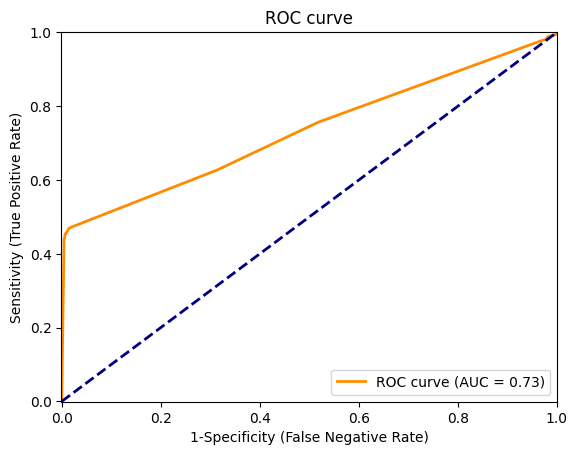

 AUC: 0.7327410999707203


In [18]:
# Plotting classification results
print('Metrics of the model: \n')

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

Gradient Boosting classifier

In [28]:
# Given the maximized AUC I look for a level of threshold that maximizes accuracy, i.e. rate of correctly classified late arrivals and correctly classified arrivals on time
warnings.filterwarnings("ignore", category=RuntimeWarning)
model = GradientBoostingClassifier(random_state = 42, criterion = 'friedman_mse', learning_rate = 0.01, loss = 'log_loss', max_depth = 3, n_estimators = 223).fit(X_train, y_train)

classification_threshold_range = [x / 1000 for x in range(0, 1001, 1)]
threshold_list = []

for i in classification_threshold_range:
  y_pred_prob = model.predict_proba(X_test)[:,1] # probabilities
  y_pred = np.where(y_pred_prob > i, 1, 0)
  accuracy = custom_accuracy_score(y_test, y_pred)
  sensitivity = custom_sensitivity_score(y_test, y_pred)
  specificity = custom_specificity_score(y_test, y_pred)
  ppv = custom_ppv_score(y_test, y_pred)
  npv = custom_npv_score(y_test, y_pred)
  threshold_list.append([i, accuracy, sensitivity, specificity, ppv, npv])

#threshold_list.append()
#threshold_list

In [29]:
# Defining metrics
max_accuracy = max_sensitivity = max_specificity = max_ppv = max_npv = float('-inf')

for row in threshold_list:
    if row[1] > max_accuracy:
        max_accuracy = row[1]
        accuracy_threshold = row[0]
    if row[2] > max_sensitivity:
        max_sensitivity = row[2]
        sensitivity_threshold = row[0]
    if row[3] > max_specificity:
        max_specificity = row[3]
        specificity_threshold = row[0]
    if row[4] > max_ppv:
        max_ppv = row[4]
        ppv_threshold = row[0]
    if row[5] > max_npv:
        max_npv = row[5]
        npv_threshold = row[0]

print("Maximum accuracy:", max_accuracy, ", Threshold: ", accuracy_threshold)
print("Maximum sensitivity:", max_sensitivity, ", Threshold: ", sensitivity_threshold)
print("Maximum specificity:", max_specificity, ", Threshold: ", specificity_threshold)
print("Maximum ppv:", max_ppv, ", Threshold: ", ppv_threshold)
print("Maximum npv:", max_npv, ", Threshold: ", npv_threshold)

Maximum accuracy: 0.6859090909090909 , Threshold:  0.479
Maximum sensitivity: 1.0 , Threshold:  0.0
Maximum specificity: 1.0 , Threshold:  0.842
Maximum ppv: 1.0 , Threshold:  0.842
Maximum npv: 1.0 , Threshold:  0.338


In [30]:
# Checking the classification
y_pred_prob = model.predict_proba(X_test)[:,1] # probabilities
y_pred = np.where(y_pred_prob > accuracy_threshold, 1, 0)

# print(y_pred_prob)
# print(y_pred)

Metrics of the model: 

Confusion matrix: 
[[752 135]
 [556 757]]
                                   Accuracy: 0.6859090909090909
                   SENSITIVITY (aka RECALL): 0.5765422696115765
                 SPECIFICITY (aka FALL-OUT): 0.8478015783540023
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.8486547085201793
                 NEGATIVE PREDICTIVE VALUE): 0.5749235474006116


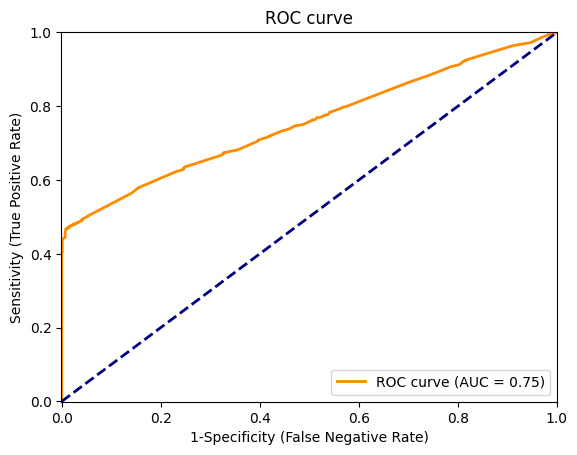

 AUC: 0.7547983009210643


In [31]:
# Plotting classification results
print('Metrics of the model: \n')

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

## Gradient Boosting classifier is the best out of the two algorithms based on AUC and accuracy

# As a result we found a tuned algorithm that best classifies late arrivals which can be used for prediction and prevention.